In [2]:
import numpy as np
from astropy.timeseries import BoxLeastSquares
import matplotlib.pyplot as plt

from dataInteraction import read_data

Parameters for system 211526186 not found :(
Reference parameters: t0 = 2306.6711849884327, period = 0.4551028336097574


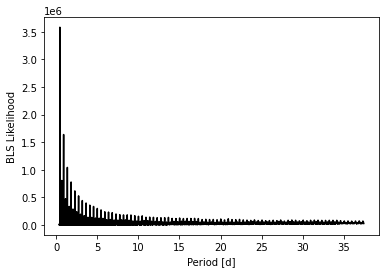

0.4551028336097574
0.05
2306.6711849884327

transit_times : [2306.67118499 2307.12628782 2307.58139066 2308.03649349 2308.49159632
 2308.94669916 2309.40180199 2309.85690482 2310.31200766 2310.76711049
 2311.22221332 2311.67731616 2312.13241899 2312.58752183 2313.04262466
 2313.49772749 2313.95283033 2314.40793316 2314.86303599 2315.31813883
 2315.77324166 2316.22834449 2316.68344733 2317.13855016 2317.593653
 2318.04875583 2318.50385866 2318.9589615  2319.41406433 2319.86916716
 2320.32427    2320.77937283 2321.23447566 2321.6895785  2322.14468133
 2322.59978416 2323.054887   2323.50998983 2323.96509267 2324.4201955
 2324.87529833 2325.33040117 2325.785504   2326.24060683 2326.69570967
 2327.1508125  2327.60591533 2328.06101817 2328.516121   2328.97122384
 2329.42632667 2329.8814295  2330.33653234 2330.79163517 2331.246738
 2331.70184084 2332.15694367 2332.6120465  2333.06714934 2333.52225217
 2333.97735501 2334.43245784 2334.88756067 2335.34266351 2335.79776634
 2336.25286917 2336.70

In [3]:
model = read_data(211526186 , campaign=5)
t = model.lightcurve.time
y = model.lightcurve.flux
dy = model.lightcurve.flux_err

bls = BoxLeastSquares(t, y, dy)
periods = np.linspace(0.7, 30, 5000)
durations = [0.05,0.1,0.2]
periodogram = bls.autopower(durations)

plt.plot(periodogram.period, periodogram.power, 'k')
plt.xlabel("Period [d]")
plt.ylabel("BLS Likelihood")
plt.show()

max_power = np.argmax(periodogram.power)
print(periodogram.period[max_power])
print(periodogram.duration[max_power])
print(periodogram.transit_time[max_power])

stats = bls.compute_stats(periodogram.period[max_power],
                          periodogram.duration[max_power],
                          periodogram.transit_time[max_power])
print("")
for k in stats:
    print(k, ":", stats[k])